# IBM Stock Market Prediction using CNN model

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# Data Preprocessing and Analysis

In [56]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [57]:
# lOADING THE DATASET
data = pd.read_csv('DATA/ibm.us.csv')

data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     14059 non-null  object 
 1   Open     14059 non-null  float64
 2   High     14059 non-null  float64
 3   Low      14059 non-null  float64
 4   Close    14059 non-null  float64
 5   Volume   14059 non-null  int64  
 6   OpenInt  14059 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 769.0+ KB


In [59]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,14059.000000,14059.000000,14059.000000,14059.000000,1.405900e+04,14059.0
mean,48.535548,48.987464,48.111897,48.554195,5.782966e+06,0.0
std,49.270969,49.663765,48.912626,49.297698,5.429533e+06,0.0
min,3.390100,3.565500,3.323500,3.390100,0.000000e+00,0.0
25%,13.238500,13.358000,13.145000,13.234000,1.471590e+06,0.0
50%,23.029000,23.213000,22.819000,23.029000,4.801835e+06,0.0
75%,77.383500,78.154000,76.743500,77.444500,8.224838e+06,0.0
max,186.010000,186.460000,185.060000,186.360000,8.316590e+07,0.0


In [60]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
OpenInt,0


Filling null columns with mean values....

In [61]:
data.reset_index(drop=True, inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


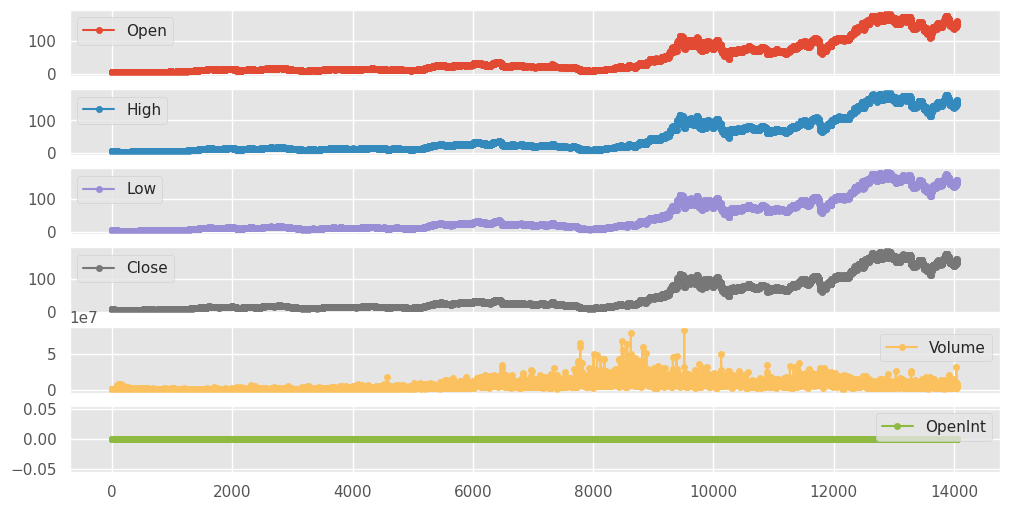

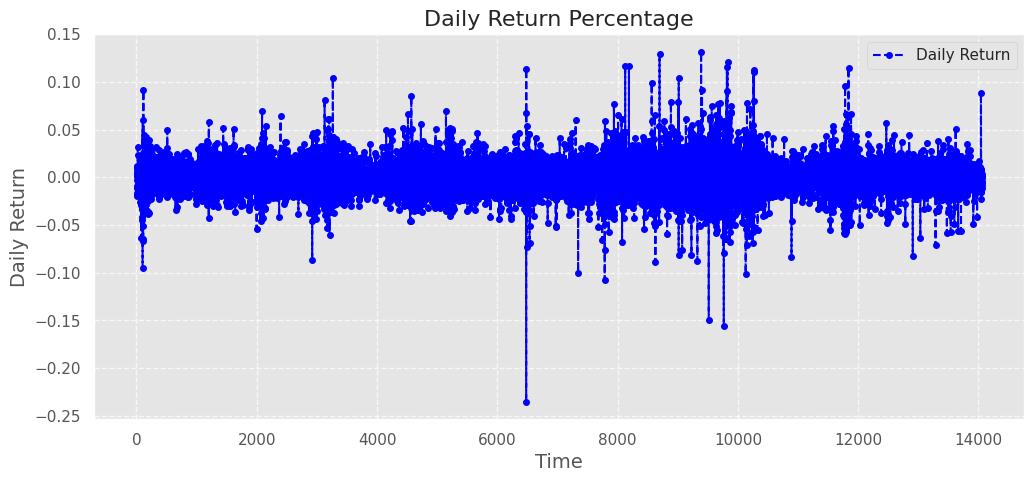

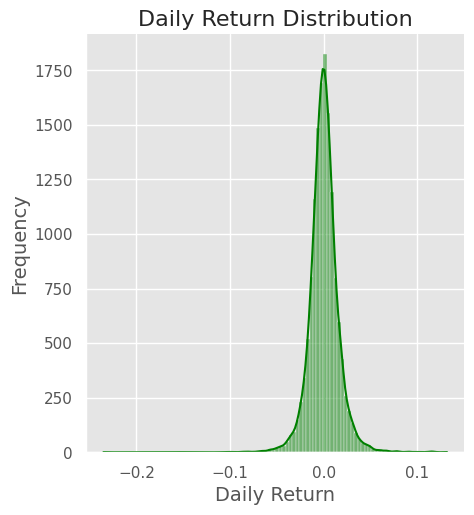

             Date      Open      High       Low     Close   Volume  OpenInt  \
0      1962-01-02    6.4130    6.4130    6.3378    6.3378   467056        0   
1      1962-01-03    6.3378    6.3963    6.3378    6.3963   350294        0   
2      1962-01-04    6.3963    6.3963    6.3295    6.3295   314365        0   
3      1962-01-05    6.3211    6.3211    6.1958    6.2041   440112        0   
4      1962-01-08    6.2041    6.2041    6.0373    6.0870   655676        0   
...           ...       ...       ...       ...       ...      ...      ...   
14054  2017-11-06  150.2700  150.3200  148.7900  149.3500  4543499        0   
14055  2017-11-07  149.8700  150.0100  149.0100  149.8500  3729501        0   
14056  2017-11-08  150.1000  150.2800  148.7900  150.0700  4679520        0   
14057  2017-11-09  149.9300  151.8000  149.8600  150.3000  4776388        0   
14058  2017-11-10  150.6500  150.8900  149.1400  149.1600  4306433        0   

       MA for 10 days  MA for 50 days  MA for 100 d

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
OpenInt,0
MA for 10 days,9
MA for 50 days,49
MA for 100 days,99


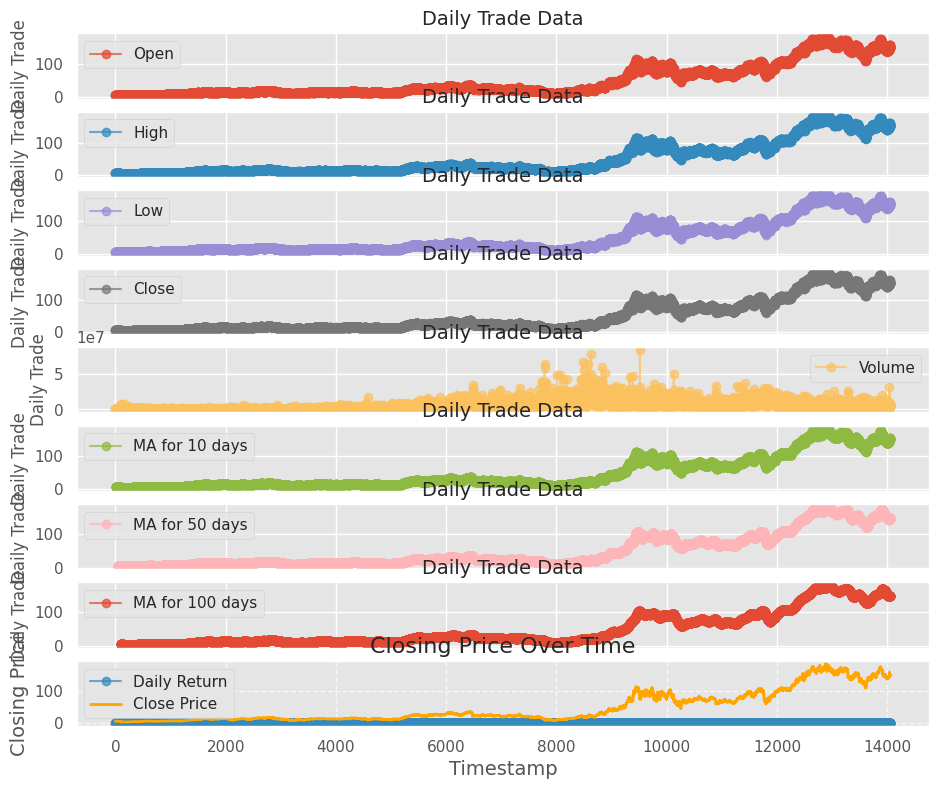

In [62]:
data.plot(legend=True, subplots=True, figsize=(12, 6), marker='o', markersize=4)
plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10, 50, 100]

for ma in ma_day:
    column_name = "MA for %s days" % (str(ma))
    data[column_name] = pd.DataFrame.rolling(data['Close'], ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12, 5), legend=True, linestyle='--', marker='o', markersize=4, color='blue')
plt.title('Daily Return Percentage', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Daily Return', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

sns.displot(data['Daily Return'].dropna(), bins=100, color='green', kde=True)
plt.title('Daily Return Distribution', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

date = pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1 = closing_df1.rename(columns={"Close": "data_close"})
close2 = pd.concat([date, close1], axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
# data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1, ascending=True)

cols_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA for 10 days', 'MA for 50 days', 'MA for 100 days', 'Daily Return']
axes = data[cols_plot].plot(marker='o', alpha=0.7, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trade')
    ax.set_title('Daily Trade Data', fontsize=14)

plt.plot(data['Close'], label="Close Price", color='orange', linewidth=2)
plt.xlabel("Timestamp", fontsize=14)
plt.ylabel("Closing Price", fontsize=14)
plt.title("Closing Price Over Time", fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
df = data
print(df)

data.isnull().sum()


Visualizing the data

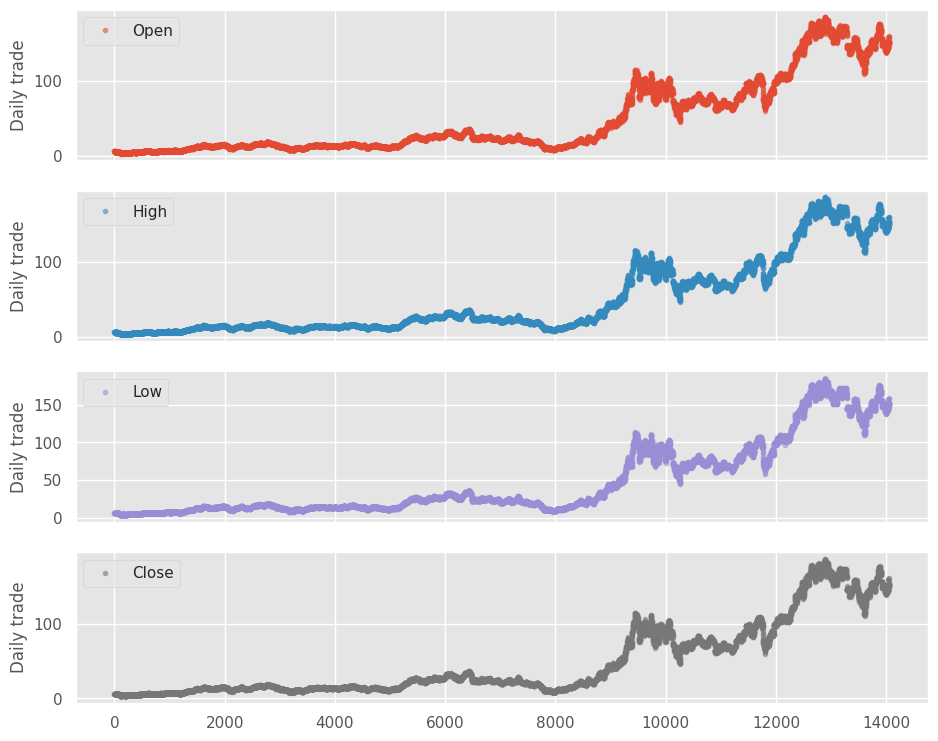

In [63]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

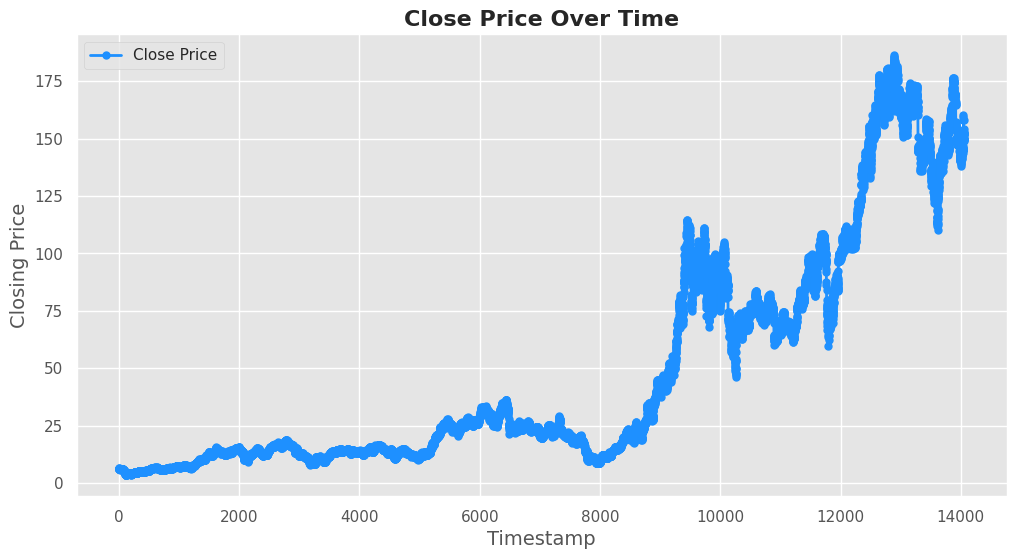

             Date      Open      High       Low     Close   Volume  OpenInt  \
0      1962-01-02    6.4130    6.4130    6.3378    6.3378   467056        0   
1      1962-01-03    6.3378    6.3963    6.3378    6.3963   350294        0   
2      1962-01-04    6.3963    6.3963    6.3295    6.3295   314365        0   
3      1962-01-05    6.3211    6.3211    6.1958    6.2041   440112        0   
4      1962-01-08    6.2041    6.2041    6.0373    6.0870   655676        0   
...           ...       ...       ...       ...       ...      ...      ...   
14054  2017-11-06  150.2700  150.3200  148.7900  149.3500  4543499        0   
14055  2017-11-07  149.8700  150.0100  149.0100  149.8500  3729501        0   
14056  2017-11-08  150.1000  150.2800  148.7900  150.0700  4679520        0   
14057  2017-11-09  149.9300  151.8000  149.8600  150.3000  4776388        0   
14058  2017-11-10  150.6500  150.8900  149.1400  149.1600  4306433        0   

       MA for 10 days  MA for 50 days  MA for 100 d

,count,mean,std,min,25%,50%,75%,max
Open,14059.0,4.853555e+01,4.927097e+01,3.390100,1.323850e+01,2.302900e+01,7.738350e+01,1.860100e+02
High,14059.0,4.898746e+01,4.966377e+01,3.565500,1.335800e+01,2.321300e+01,7.815400e+01,1.864600e+02
Low,14059.0,4.811190e+01,4.891263e+01,3.323500,1.314500e+01,2.281900e+01,7.674350e+01,1.850600e+02
Close,14059.0,4.855420e+01,4.929770e+01,3.390100,1.323400e+01,2.302900e+01,7.744450e+01,1.863600e+02
Volume,14059.0,5.782966e+06,5.429533e+06,0.000000,1.471590e+06,4.801835e+06,8.224838e+06,8.316590e+07
OpenInt,14059.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MA for 10 days,14050.0,4.853521e+01,4.925781e+01,3.595540,1.325278e+01,2.303730e+01,7.755005e+01,1.841230e+02
MA for 50 days,14010.0,4.845181e+01,4.909357e+01,3.971344,1.328639e+01,2.317816e+01,7.813004e+01,1.792034e+02
MA for 100 days,13960.0,4.835702e+01,4.891359e+01,4.047583,1.330256e+01,2.325362e+01,7.788804e+01,1.774534e+02
Daily Return,14058.0,3.499640e-04,1.581961e-02,-0.235217,-7.829443e-03,0.000000e+00,8.184296e-03,1.317184e-01


In [64]:
# Plot 'Close' price with enhanced styling
plt.figure(figsize=(12, 6))  # Set figure size
plt.plot(data['Close'], label="Close Price", color='dodgerblue', linewidth=2, marker='o', markersize=5)  # Adding marker and color
plt.title("Close Price Over Time", fontsize=16, weight='bold')  # Add a title with bold font
plt.xlabel("Timestamp", fontsize=14)  # Label for x-axis
plt.ylabel("Closing Price", fontsize=14)  # Label for y-axis
plt.grid(True)  # Add gridlines for better readability
plt.legend()  # Show legend
plt.show()

df = data
print(df)

df.describe().transpose()

In [65]:


from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    #Reshape data 
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))
#Ten split data into training and testing manually (80%, 20%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

11165
2792


# Training part

In [66]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0054 - mae: 0.0539 - mse: 0.0054 - val_loss: 0.0021 - val_mae: 0.0337 - val_mse: 0.0021
Epoch 2/40
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0022 - mae: 0.0351 - mse: 0.0022 - val_loss: 0.0020 - val_mae: 0.0337 - val_mse: 0.0020
Epoch 3/40
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - mae: 0.0335 - mse: 0.0020 - val_loss: 0.0020 - val_mae: 0.0337 - val_mse: 0.0020
Epoch 4/40
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019 - mae: 0.0325 - mse: 0.0019 - val_loss: 0.0018 - val_mae: 0.0313 - val_mse: 0.0018
Epoch 5/40
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0017 - mae: 0.0315 - mse: 0.0017 - val_loss: 0.0019 - val_mae: 0.0321 - val_mse: 0.0019
Epoch 6/40
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0018 - mae: 0.0326 - mse: 0.0018 - val_loss: 0.0018 - val_mae: 0.0317 - val_mse: 0.0018
Epoch 7/40
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0017 - mae: 0.0311 - mse: 0.0017 - val_loss: 0.00

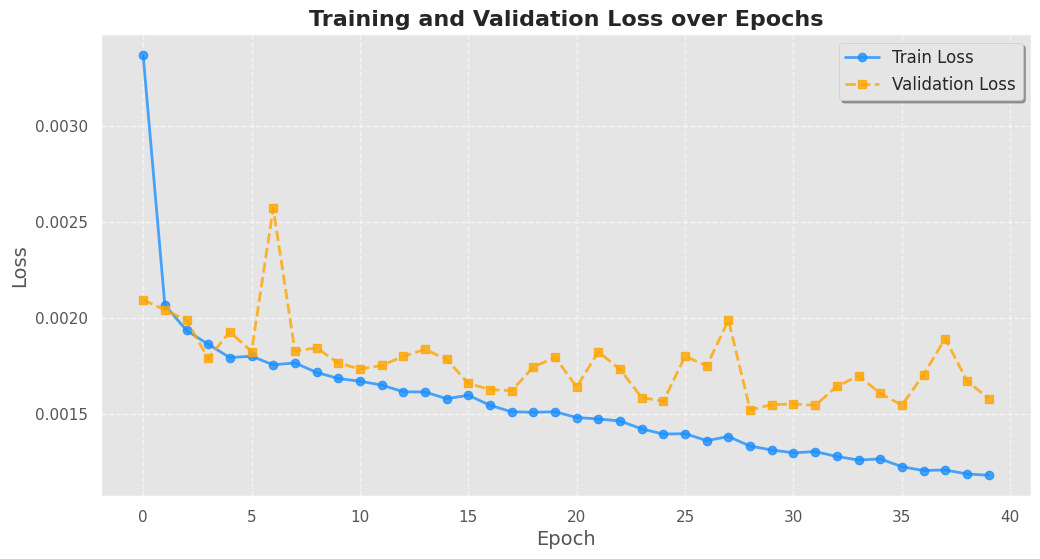

In [67]:
# Set figure size and grid style
plt.figure(figsize=(12, 6))
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid with dashed lines and transparency

# Plot training and validation loss with improved style
plt.plot(history.history['loss'], label='Train Loss', color='dodgerblue', linewidth=2, marker='o', markersize=6, linestyle='-', alpha=0.8)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2, marker='s', markersize=6, linestyle='--', alpha=0.8)

# Add title and axis labels with font adjustments
plt.title("Training and Validation Loss over Epochs", fontsize=16, weight='bold')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)

# Add a legend with improved styling
plt.legend(loc='upper right', fontsize=12, shadow=True, fancybox=True)

# Display the plot
plt.show()

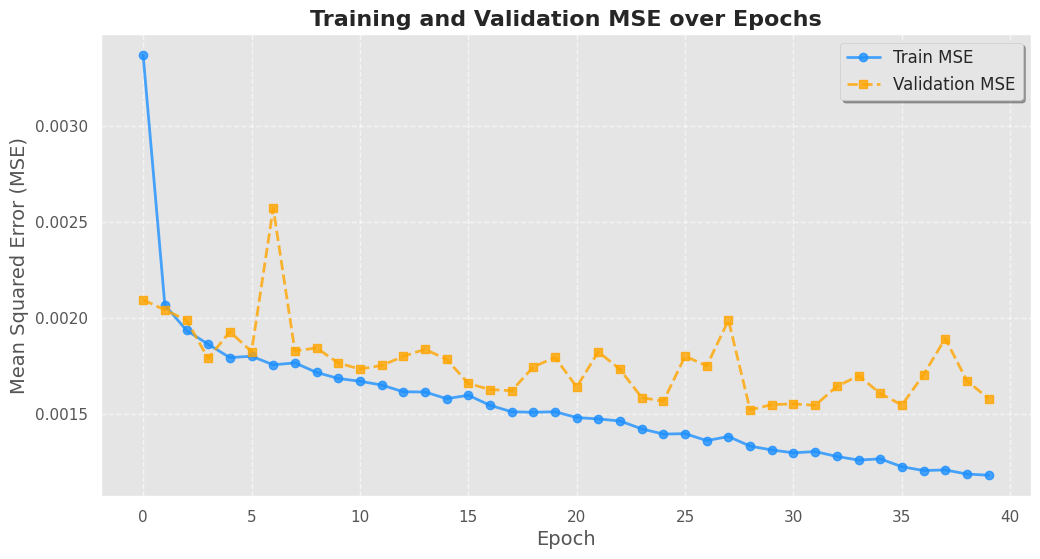

In [68]:
# Set figure size and grid style
plt.figure(figsize=(12, 6))
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid with dashed lines and transparency

# Plot training and validation MSE with improved style
plt.plot(history.history['mse'], label='Train MSE', color='dodgerblue', linewidth=2, marker='o', markersize=6, linestyle='-', alpha=0.8)
plt.plot(history.history['val_mse'], label='Validation MSE', color='orange', linewidth=2, marker='s', markersize=6, linestyle='--', alpha=0.8)

# Add title and axis labels with font adjustments
plt.title("Training and Validation MSE over Epochs", fontsize=16, weight='bold')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)

# Add a legend with improved styling
plt.legend(loc='upper right', fontsize=12, shadow=True, fancybox=True)

# Display the plot
plt.show()

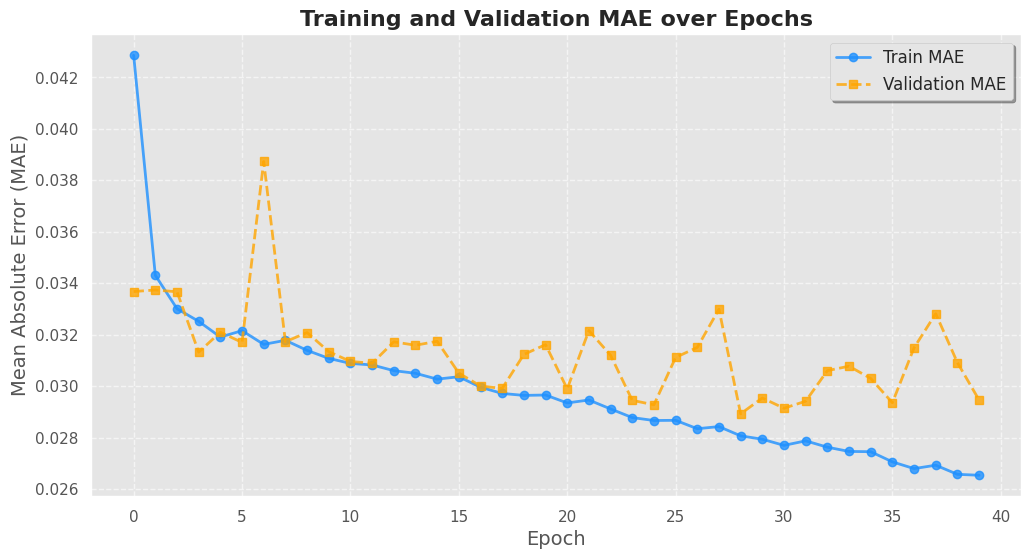

In [69]:
# Set figure size and grid style
plt.figure(figsize=(12, 6))
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid with dashed lines and transparency

# Plot training and validation MAE with improved style
plt.plot(history.history['mae'], label='Train MAE', color='dodgerblue', linewidth=2, marker='o', markersize=6, linestyle='-', alpha=0.8)
plt.plot(history.history['val_mae'], label='Validation MAE', color='orange', linewidth=2, marker='s', markersize=6, linestyle='--', alpha=0.8)

# Add title and axis labels with font adjustments
plt.title("Training and Validation MAE over Epochs", fontsize=16, weight='bold')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14)

# Add a legend with improved styling
plt.legend(loc='upper right', fontsize=12, shadow=True, fancybox=True)

# Display the plot
plt.show()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed_14                  │ (None, 1, 98, 64)           │             256 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_15                  │ (None, 1, 49, 64)           │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_16                  │ (None, 1, 47, 128)          │          24,704 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_17                  │ (None, 1, 23, 128)          │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_18                  │ (None, 1, 21, 64)           │          24,640 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_19                  │ (None, 1, 10, 64)           │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_20                  │ (None, 1, 640)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 1)                │             641 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 150,725 (588.77 KB)

 Trainable params: 50,241 (196.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 100,484 (392.52 KB)

None


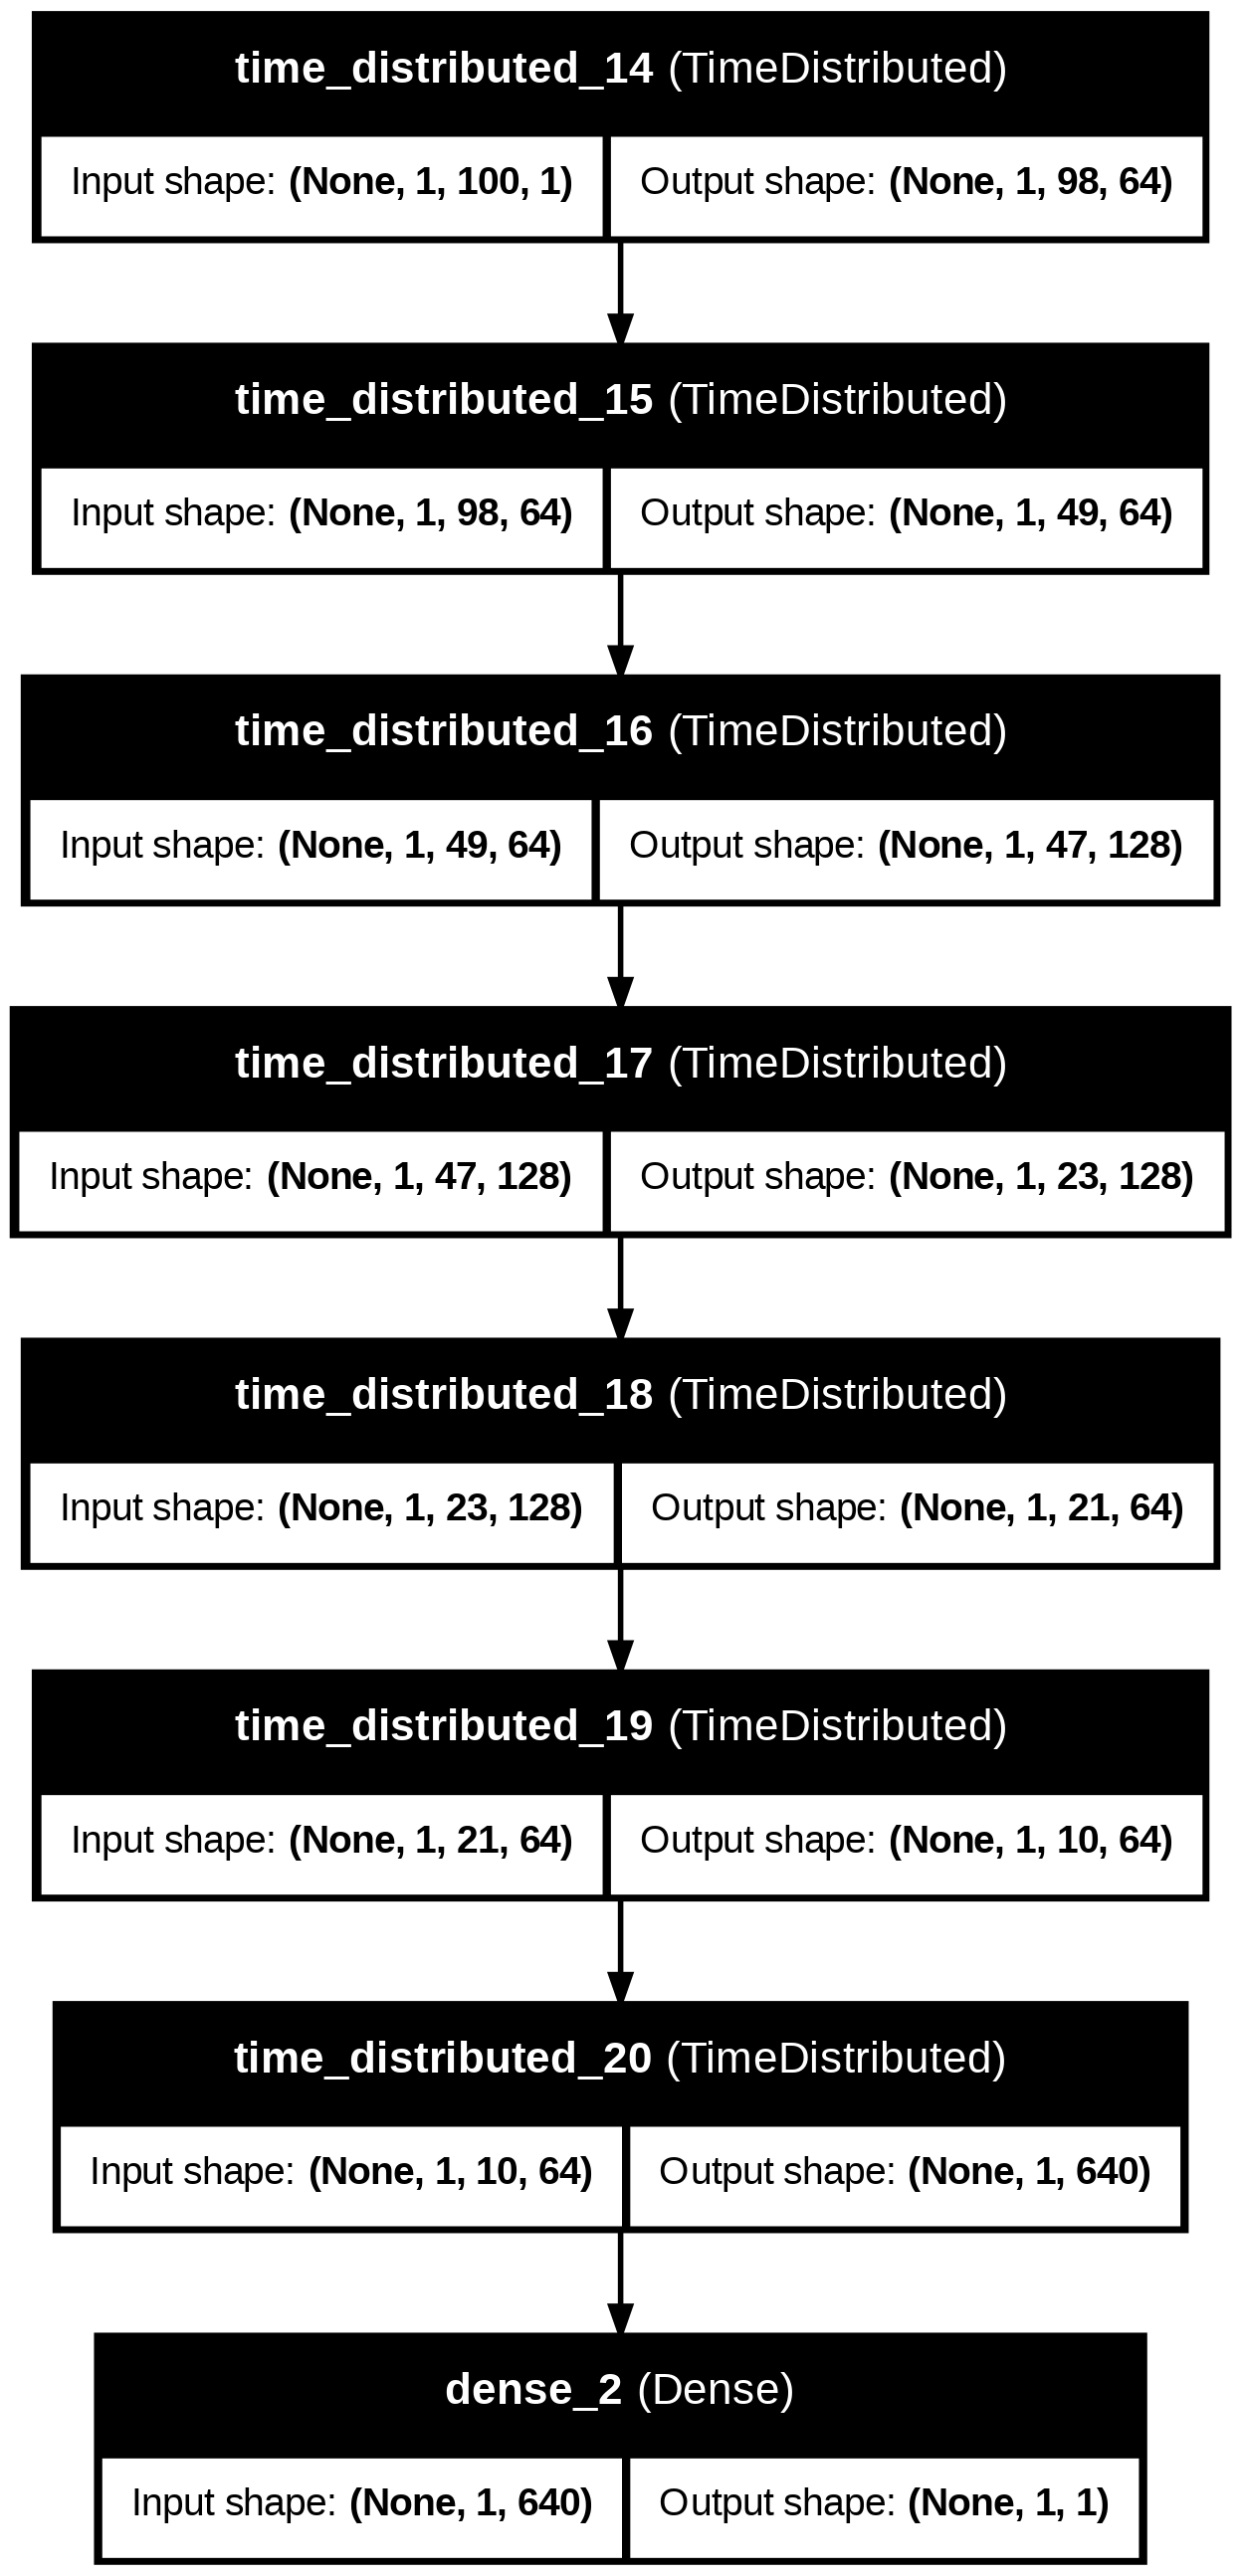

In [70]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [71]:
model.evaluate(test_X, test_Y)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0295 - mse: 0.0016


[0.0015795911895111203, 0.0015795911895111203, 0.02945959009230137]

In [72]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.935206
R2 Score: 0.935206
Max Error: 0.242381


88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


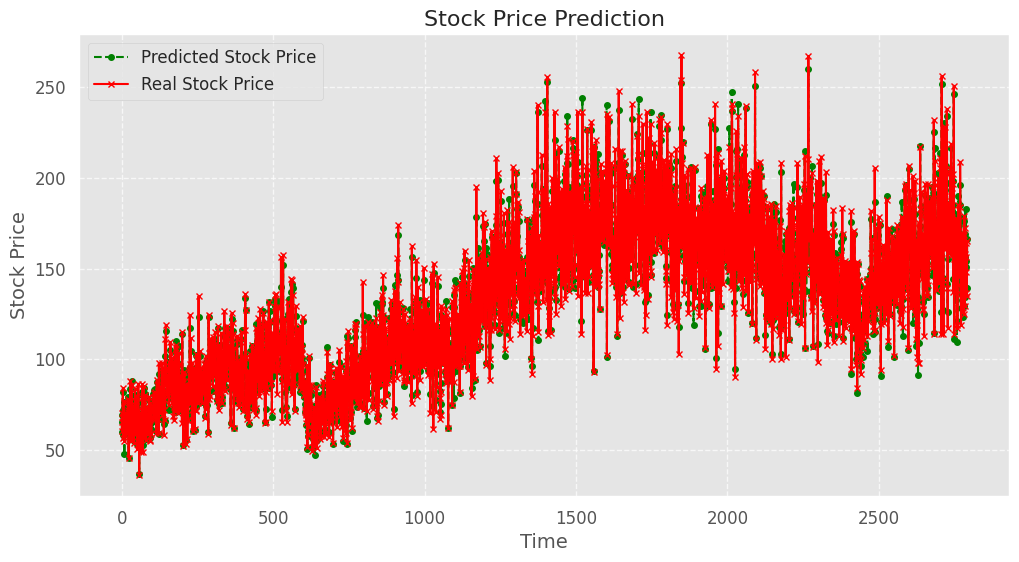

In [73]:
predicted = model.predict(test_X)
test_label = test_Y.reshape(-1, 1)
predicted = np.array(predicted[:, 0]).reshape(-1, 1)
len_t = len(train_X)
for j in range(len_t, len_t + len(test_X)):
    temp = data.iloc[j, 3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp

plt.figure(figsize=(12, 6))
plt.plot(predicted, color='green', label='Predicted Stock Price', linestyle='--', marker='o', markersize=4)
plt.plot(test_label, color='red', label='Real Stock Price', linestyle='-', marker='x', markersize=4)
plt.title('Stock Price Prediction', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()
